In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
within_topic_df = pd.read_csv("within_topic.csv")

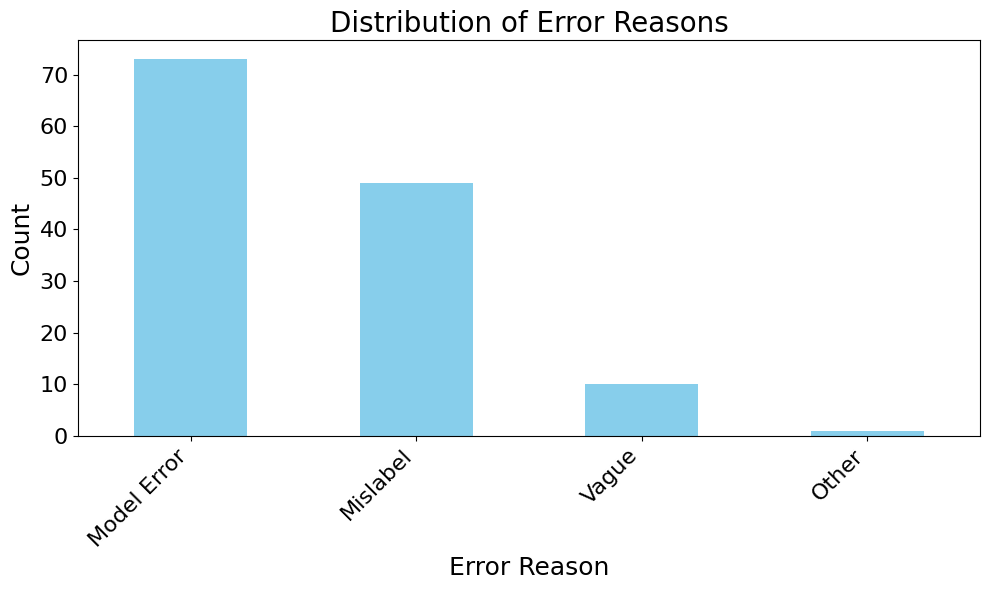

In [3]:
error_reason_counts = within_topic_df['Error Reason'].value_counts()

# Set the size of your figure
plt.figure(figsize=(10, 6))

error_reason_counts.plot(kind='bar', color='skyblue')

# Set the title with a larger font size
plt.title('Distribution of Error Reasons', fontsize=20)

# Set the labels with larger font sizes
plt.xlabel('Error Reason', fontsize=18)
plt.ylabel('Count', fontsize=18)

plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()

plt.savefig('error_reasons_distribution.png', dpi=300)

plt.show()

In [4]:
error_reason_counts = within_topic_df['Error Reason'].value_counts()
error_reason_counts

Error Reason
Model Error    73
Mislabel       49
Vague          10
Other           1
Name: count, dtype: int64

In [5]:
mislabels = within_topic_df[within_topic_df['Error Reason'] == "Mislabel"]
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
# values = []
mislabels['cluster_bins'] = pd.cut(mislabels['Cluster confidence'], bins)
# mislabels

<ipython-input-5-41360370bb71>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mislabels['cluster_bins'] = pd.cut(mislabels['Cluster confidence'], bins)


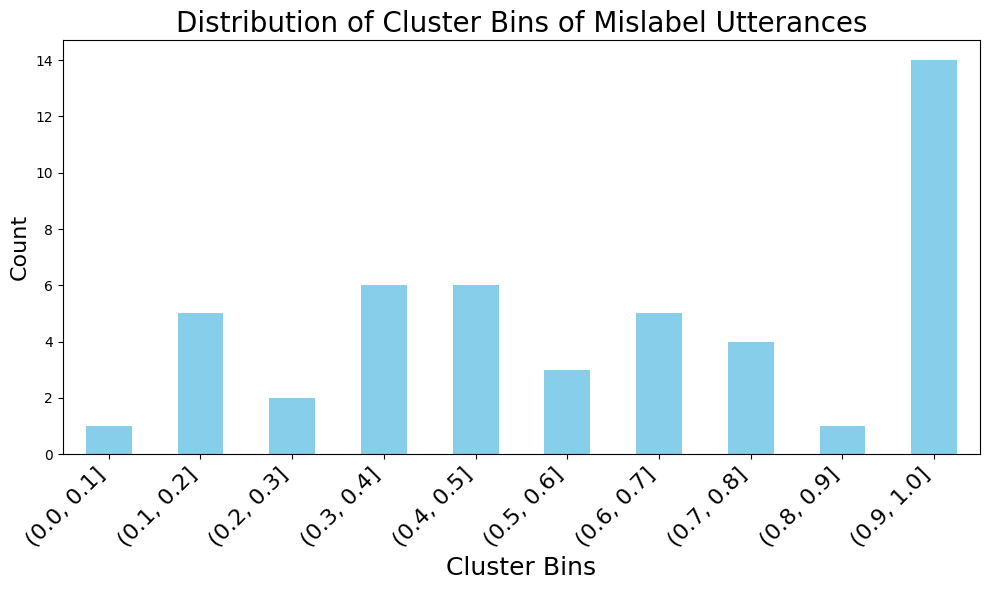

In [6]:
cluster_bin_counts = mislabels['cluster_bins'].value_counts(sort=False)

plt.figure(figsize=(10, 6))

cluster_bin_counts.plot(kind='bar', color='skyblue')

plt.title('Distribution of Cluster Bins of Mislabel Utterances', fontsize=20)

plt.xlabel('Cluster Bins', fontsize=18)
plt.ylabel('Count', fontsize=18)

plt.xticks(rotation=45, ha='right', fontsize=16)
plt.ylabel('Count', fontsize=16)

plt.tight_layout()

plt.savefig('cluster_bins_mislabel.png', dpi=300)

plt.show()

In [7]:
model_error = within_topic_df[within_topic_df['Error Reason'] == "Model Error"]
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
# values = []
model_error['cluster_bins'] = pd.cut(model_error['Cluster confidence'], bins)

<ipython-input-7-53b7607d4c8d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_error['cluster_bins'] = pd.cut(model_error['Cluster confidence'], bins)


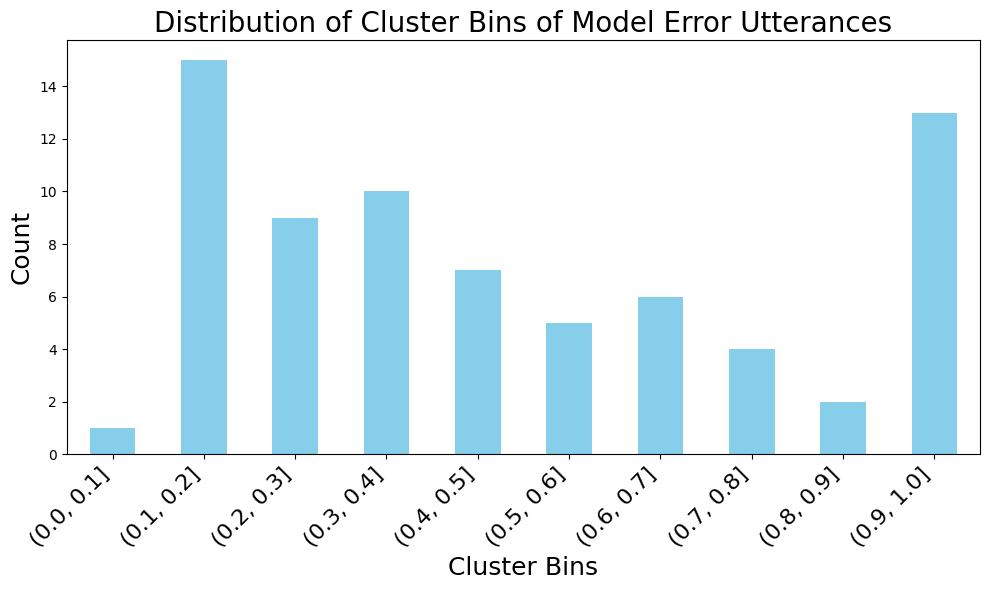

In [8]:
cluster_bin_counts_ME = model_error['cluster_bins'].value_counts(sort=False)

plt.figure(figsize=(10, 6))

cluster_bin_counts_ME.plot(kind='bar', color='skyblue')

plt.title('Distribution of Cluster Bins of Model Error Utterances', fontsize=20)

plt.xlabel('Cluster Bins', fontsize=18)
plt.ylabel('Count', fontsize=18)

plt.xticks(rotation=45, ha='right', fontsize=16)

plt.tight_layout()

plt.savefig('cluster_bins_model_error.png', dpi=300)

plt.show()

In [9]:
cluster_bin_counts_ME

cluster_bins
(0.0, 0.1]     1
(0.1, 0.2]    15
(0.2, 0.3]     9
(0.3, 0.4]    10
(0.4, 0.5]     7
(0.5, 0.6]     5
(0.6, 0.7]     6
(0.7, 0.8]     4
(0.8, 0.9]     2
(0.9, 1.0]    13
Name: count, dtype: int64

In [10]:
cluster_bin_counts

cluster_bins
(0.0, 0.1]     1
(0.1, 0.2]     5
(0.2, 0.3]     2
(0.3, 0.4]     6
(0.4, 0.5]     6
(0.5, 0.6]     3
(0.6, 0.7]     5
(0.7, 0.8]     4
(0.8, 0.9]     1
(0.9, 1.0]    14
Name: count, dtype: int64

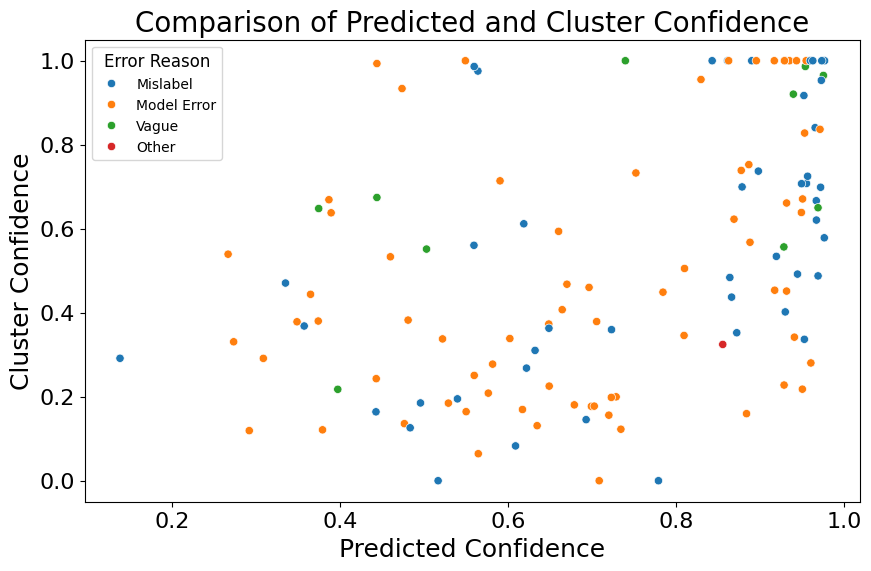

In [11]:
# mislabels
plt.figure(figsize=(10, 6))

sns.scatterplot(data=within_topic_df, x="Predicted confidence",
                y="Cluster confidence", hue="Error Reason")

plt.legend(title="Error Reason", title_fontsize='large', fontsize='medium')

plt.title('Comparison of Predicted and Cluster Confidence', fontsize=20)

plt.xlabel('Predicted Confidence', fontsize=18)
plt.ylabel('Cluster Confidence', fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.savefig('cluster_confidence_scatter.png', dpi=300)

plt.show()

In [12]:
# from google.colab import files
# files.download('error_reasons_distribution.png')
# files.download('cluster_bins_mislabel.png')
# files.download('cluster_bins_model_error.png')
# files.download('cluster_confidence_scatter.png')

In [13]:
within_topic_df["Confidence Difference"] = np.maximum(within_topic_df["Predicted confidence"], within_topic_df["Cluster confidence"]) - np.minimum(within_topic_df["Predicted confidence"], within_topic_df["Cluster confidence"])

within_topic_df.head()

,Error Reason,Utterance,Assigned label,Predicted label,Predicted confidence,Cluster confidence,Cluster,Cluster name,Assigned topic name,Predicted topic name,Cluster topic name,Confidence Difference
0,Mislabel,Is there a way to know when my card will arrive?,card_arrival,card_delivery_estimate,0.944849,0.491954,14,card_delivery_estimate,new_card,new_card,new_card,0.452895
1,Mislabel,When will I get my card?,card_arrival,card_delivery_estimate,0.967209,0.666685,14,card_delivery_estimate,new_card,new_card,new_card,0.300524
2,Mislabel,How long does a card delivery take?,card_arrival,card_delivery_estimate,0.967351,0.620590,14,card_delivery_estimate,new_card,new_card,new_card,0.346761
3,Model Error,Status of the card I ordered.,card_arrival,lost_or_stolen_card,0.374374,0.380206,57,order_physical_card,new_card,new_card,new_card,0.005832
4,Mislabel,How do I know when my card will arrive?,card_arrival,card_delivery_estimate,0.965850,0.840648,14,card_delivery_estimate,new_card,new_card,new_card,0.125203


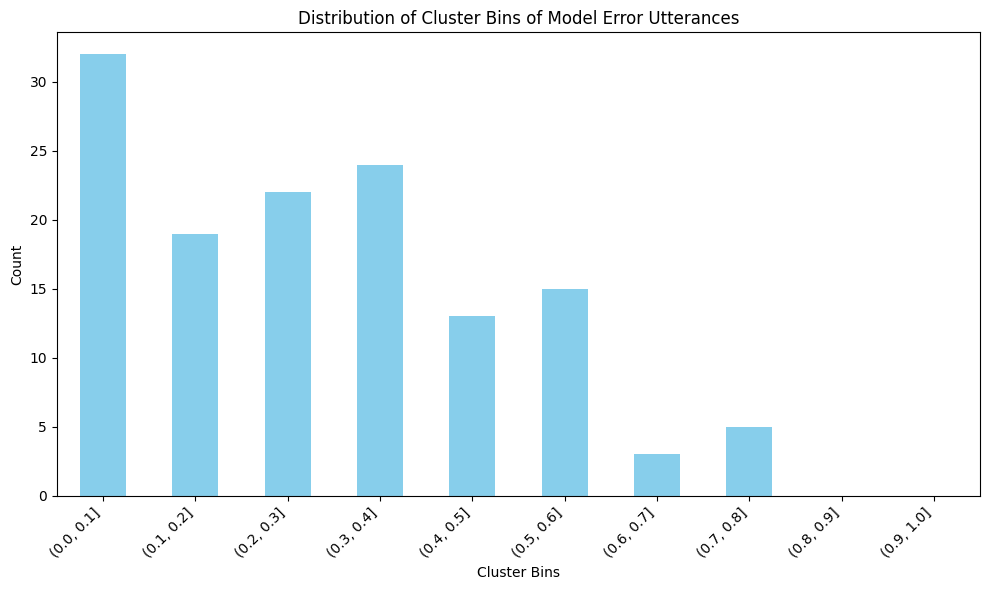

In [14]:
within_topic_df['confidence_diff_bins'] = pd.cut(within_topic_df['Confidence Difference'], bins)

cluster_bin_counts_ME = within_topic_df['confidence_diff_bins'].value_counts(sort=False)
plt.figure(figsize=(10, 6))
cluster_bin_counts_ME.plot(kind='bar', color='skyblue')
plt.title('Distribution of Cluster Bins of Model Error Utterances')
plt.xlabel('Cluster Bins')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [15]:
# Do a scatterplot between cluster confidence and model probability
# Compare nodes dorm different clistering techniques